In [1]:
import numpy as np
import matplotlib.pyplot as plt

from itertools import product, combinations

In [2]:
graph = {
    0: {1, 2, 3},
    1: {0, 2, 3},
    2: {0, 1, 3},
    3: {0, 1, 2}
}

In [3]:
degree_of_graph = max(len(j) for i, j in graph.items())
degree_of_graph

3

In [4]:
possible_node_values = set(range(degree_of_graph + 1))
possible_node_values

{0, 1, 2, 3}

In [5]:
pertubations = set(product(possible_node_values, repeat=len(graph)))
# pertubations

In [6]:
def get_program_transitions_perturbations(start_state):
    result = set()
    for position, val in enumerate(start_state):
        perturb_values_for_position = possible_node_values - {val}
        for perturb_val in perturb_values_for_position:
            perturb_state = list(start_state)
            perturb_state[position] = perturb_val
            result.add(tuple(perturb_state))
    return result

In [7]:
transition_steps_betn_perturbations = {}

for perturb in pertubations:
    transition_steps_betn_perturbations[perturb] = get_program_transitions_perturbations(perturb)

# transition_steps_betn_perturbations

In [8]:
rank_states = {0: set()}
for state in pertubations:
    # print(state)
    all_paths = combinations(range(len(state)), 2)
    for path in all_paths:
        if path[1] in graph[path[0]] and state[path[0]] == state[path[1]]:
            # found same color node between neighbors
            break
    else:
        rank_states[0].add(state)
            
remaining_states_to_be_ranked = pertubations - rank_states[0]
# rank_states

In [9]:
init = 0
while remaining_states_to_be_ranked:
    temp = set()
    for state in rank_states[init]:
        temp = temp.union({i for i in transition_steps_betn_perturbations[state] if i in remaining_states_to_be_ranked})
    init += 1
    rank_states[init] = temp
    remaining_states_to_be_ranked = remaining_states_to_be_ranked - temp
    print(len(remaining_states_to_be_ranked))

88
4
0


In [10]:
# rank_states

In [11]:
rank_states_inverse = {j: i for i, values in rank_states.items() for j in values}
# rank_states_inverse

In [12]:
cost = []

for state in rank_states_inverse:
    other_states = set(rank_states_inverse.keys()) - {state}
    for o_state in other_states:
        cost.append(rank_states_inverse[state] - rank_states_inverse[o_state])

# cost

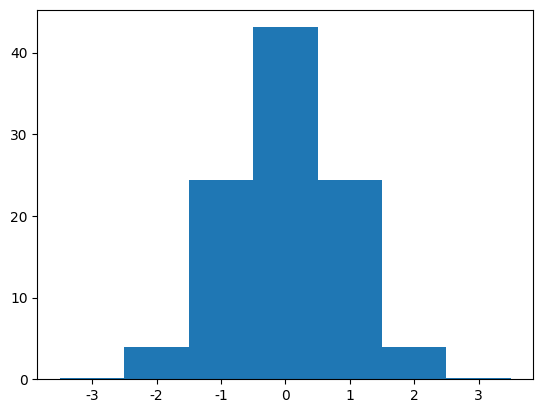

In [13]:
n, bins, patches = plt.hist(cost, bins=len(set(cost)), weights=np.ones(len(cost)) * 100 / len(cost))
ticks = [(patch._x0 + patch._width/2) for patch in patches]
ticklabels = sorted([i for i in set(cost)])
plt.xticks(ticks, ticklabels)
plt.show()